In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [8]:
ri = pd.read_csv('data/doprava_maloobchod_sluzby.csv', encoding='utf-8') # industrial production index

In [4]:
ri.head()

,idhod,hodnota,stapro_kod,casz_cis,casz_kod,cznace_cis,cznace_kod,oceneni_cis,oceneni_kod,ocisteni_cis,ocisteni_kod,mesic,rok,mesicz,rokz,stapro_txt,casz_txt,cznace_txt,oceneni_txt,ocisteni_txt
0,1263950915,93.8,1007,7626,C,5724,45470001,NaN,NaN,NaN,NaN,4,2010,4.0,2009,"Tržby z prodeje výrobků, služeb a zboží",stejné období předchozího roku,Maloobchod (vč.maloobchodního prodeje pohonnýc...,běžné ceny,neočištěno
1,1264321149,96.9,1007,7626,C,5104,47,NaN,NaN,NaN,NaN,4,2010,4.0,2009,"Tržby z prodeje výrobků, služeb a zboží",stejné období předchozího roku,"Maloobchod, kromě motorových vozidel",běžné ceny,neočištěno
2,1264519510,94.7,1007,7626,C,5724,47470001,NaN,NaN,NaN,NaN,4,2010,4.0,2009,"Tržby z prodeje výrobků, služeb a zboží",stejné období předchozího roku,Maloobchod s potravinami,běžné ceny,neočištěno
3,1264147957,119.8,1007,7626,C,5105,473,NaN,NaN,NaN,NaN,4,2010,4.0,2009,"Tržby z prodeje výrobků, služeb a zboží",stejné období předchozího roku,Maloobchod s pohonnými hmotami ve specializova...,běžné ceny,neočištěno
4,1264934195,96.4,1007,7626,C,5105,474,NaN,NaN,NaN,NaN,4,2010,4.0,2009,"Tržby z prodeje výrobků, služeb a zboží",stejné období předchozího roku,Maloobchod s počítačovým a komunikačním zaříze...,běžné ceny,neočištěno


In [9]:

ri['cznace_txt'] = ri['cznace_txt'].str.replace('\xa0', ' ')
ri['cznace_txt'].unique()

array(['Maloobchod (vč.maloobchodního prodeje pohonných hmot) a prodej a opravy motorových vozidel',
       'Maloobchod, kromě motorových vozidel', 'Maloobchod s potravinami',
       'Maloobchod s pohonnými hmotami ve specializovaných prodejnách',
       'Maloobchod s počítačovým a komunikačním zařízením ve specializovaných prodejnách',
       'Maloobchod mimo prodejny, stánky a trhy',
       'Maloobchod s nepotravinářským zbožím',
       'Maloobchod v nespecializovaných prodejnách',
       'Maloobchod s ostatními výrobky převážně pro domácnost ve specializovaných prodejnách',
       'Opravy a údržba motorových vozidel, kromě motocyklů',
       'Maloobchod s potravinami, nápoji a tabákovými výrobky ve specializovaných prodejnách',
       'Maloobchod s výrobky pro kulturní rozhled a rekreaci ve specializovaných prodejnách',
       'Maloobchod s ostatním zbožím ve specializovaných prodejnách',
       'Velkoobchod, maloobchod a opravy motorových vozidel',
       'Obchod s motorovými vozid

In [10]:
def get_data(nace, casz, oceneni, ocisteni):
    data = ri[ri['cznace_txt'] == nace]
    data = data[data['casz_txt'] == casz]
    data = data[data['oceneni_txt'] == oceneni]
    data = data[data['ocisteni_txt'] == ocisteni]
    return data.copy()

In [11]:
letani = get_data('Letecká doprava', 'stejné období předchozího roku', 'běžné ceny', 'neočištěno')

In [16]:
letani_clean = get_data('Letecká doprava', 'stejné období předchozího roku', 'běžné ceny', 'sezónně očištěno, včetně očištění o kalendářní vlivy')

In [17]:
letani_sorted = letani.sort_values(['rok', 'mesic'])
letani_clean_sorted = letani_clean.sort_values(['rok', 'mesic'])
letani_sorted['datum'] = letani_sorted['mesic'].astype(str) + '/' + letani_sorted['rok'].astype(str)

letani_clean_sorted['datum'] = letani_clean_sorted['mesic'].astype(str) + '/' + letani_clean_sorted['rok'].astype(str)

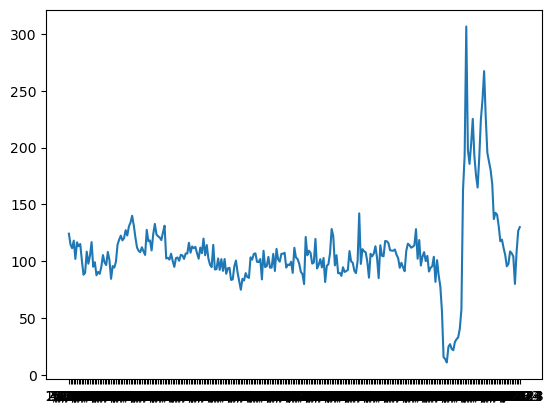

In [15]:
plt.plot(letani_sorted['datum'], letani_sorted['hodnota'])

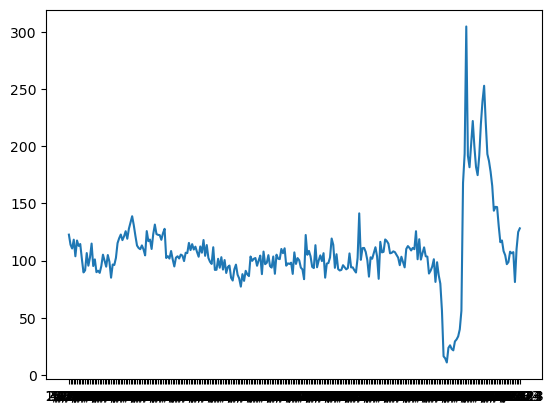

In [18]:
plt.plot(letani_clean_sorted['datum'], letani_clean_sorted['hodnota'])

In [20]:
print(letani_sorted['hodnota'][0:10])
print(letani_clean_sorted['hodnota'][0:10])

46155    124.2
45237    114.6
43777    111.4
44069    118.1
47657    102.0
44361    116.6
44653    113.2
44945    115.1
45529    100.7
46781     88.1
Name: hodnota, dtype: float64
46234    122.7
45316    113.9
43856    110.6
44148    118.3
47736    103.8
44440    117.6
44732    112.9
45024    114.5
45608    101.5
46860     89.7
Name: hodnota, dtype: float64
